<a href="https://colab.research.google.com/github/kswathi2627/API-INTEGRATION-AND-DATA-VISUALIZATION/blob/main/CD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️ Using sample data (no valid API key).


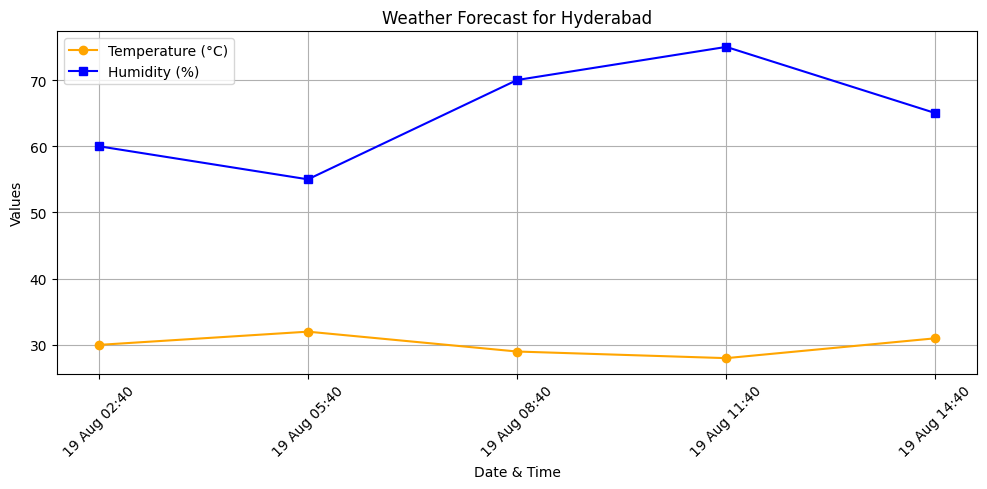

✅ Weather data visualization saved as 'weather_forecast.png'


In [1]:
import requests
import matplotlib.pyplot as plt
import datetime


# Step 1: API Configuration

API_KEY = ""
CITY = "Hyderabad"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"


# Step 2: Fetch Data

data = None
if API_KEY:
    response = requests.get(URL)
    data = response.json()

    if response.status_code != 200:
        print("❌ API Error:", data.get("message", "Unknown error"))
        data = None


# Step 3: Use API or Sample Data

if data and "list" in data:
    forecasts = data["list"][:10]
else:
    print("⚠️ Using sample data (no valid API key).")
    forecasts = [
        {"dt": 1724035200, "main": {"temp": 30, "humidity": 60}},  # sample entries
        {"dt": 1724046000, "main": {"temp": 32, "humidity": 55}},
        {"dt": 1724056800, "main": {"temp": 29, "humidity": 70}},
        {"dt": 1724067600, "main": {"temp": 28, "humidity": 75}},
        {"dt": 1724078400, "main": {"temp": 31, "humidity": 65}},
    ]

# Step 4: Process Data

dates = []
temps = []
humidity = []

for forecast in forecasts:
    dt = datetime.datetime.fromtimestamp(forecast["dt"])
    dates.append(dt.strftime("%d %b %H:%M"))
    temps.append(forecast["main"]["temp"])
    humidity.append(forecast["main"]["humidity"])


# Step 5: Visualization

plt.figure(figsize=(10, 5))

# Temperature line
plt.plot(dates, temps, marker="o", label="Temperature (°C)", color="orange")

# Humidity line
plt.plot(dates, humidity, marker="s", label="Humidity (%)", color="blue")

plt.title(f"Weather Forecast for {CITY}")
plt.xlabel("Date & Time")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and Show
plt.savefig("weather_forecast.png")
plt.show()

print("✅ Weather data visualization saved as 'weather_forecast.png'")
